# importing json file


import json per la llibreria que treballa amb json

In [26]:
import json
import numpy as np #aqui hi ha les estructures de dades que faig servir
import matplotlib.pyplot as plt #per dibuixar
import scipy.io as sio #el input output d'audio (wavfile.read)
from IPython.display import Audio #el reproductor d'audio
from numpy.fft import fft, ifft #podria fer numpy.fft en comptes de fer aquest import
from wav2vec import cutvowel, wav2vec #el nostre modul

importo el meu fitxer json

In [27]:
with open("audio_dataset_xavi.json") as f:
    data = json.load(f)
print(data[30])

{'vocal': 'A', 'start': '18.090', 'end': '18.180'}


In [28]:
start = data[30]["start"]
end = data[30]["end"]
print(float(start))

18.09


les llibreries que necesito per utilitzar i processar audio

carrego el fitxer d'audio

In [29]:
select = 21 #5 i 103
start = float(data[select]["start"])
print(start)
end=float(data[select]["end"])
print(end)

Fs, audio = sio.wavfile.read("vowels/alex.wav")
#Fs, audio = cutvowel("vowels/alex.wav"), float(data[select]["start"]), float(data[select]["end"]))
cut = audio[int(start*Fs):int(end*Fs),0]

#print(Fs)
#print(len(audio)) #per mirar si és estero o mono
#print(type(audio))
#print(type(audio[0]))

#start=4.4 #realment ho agafariem del fitxer json
#end=4.6

#framesentrada = int(float(start)*Fs) #calculem la mostra d'entrada
#framesalida = int(float(end)*Fs)
#cut=audio[framesentrada:framesalida] #retallem

#cut = audio
#data[select]["vocal"]
print(Fs)
print(cut)

13.01
13.08
48000
[-151 -144 -101 ...  176  161  128]


In [30]:
Audio(cut, rate=Fs)

dibuixem l'audio retallat

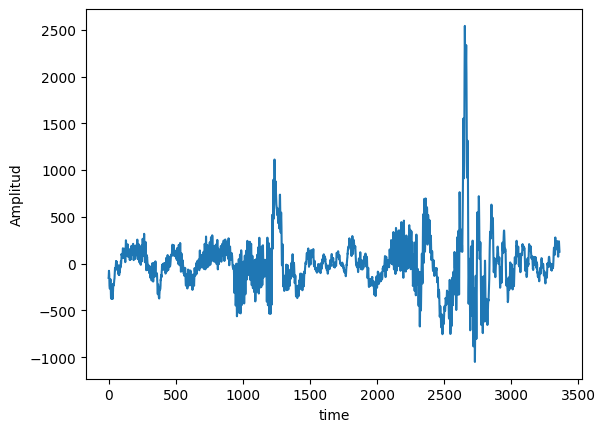

In [31]:
plt.figure()
plt.plot(cut)
plt.title("")
plt.xlabel("time")
plt.ylabel("Amplitud")
plt.show()

Dificil entendre algo. mirem fourier

/home/iticbcn/Documentos/IA/Maching Learning Classic/sklearn-env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/iticbcn/Documentos/IA/Maching Learning Classic/sklearn-env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


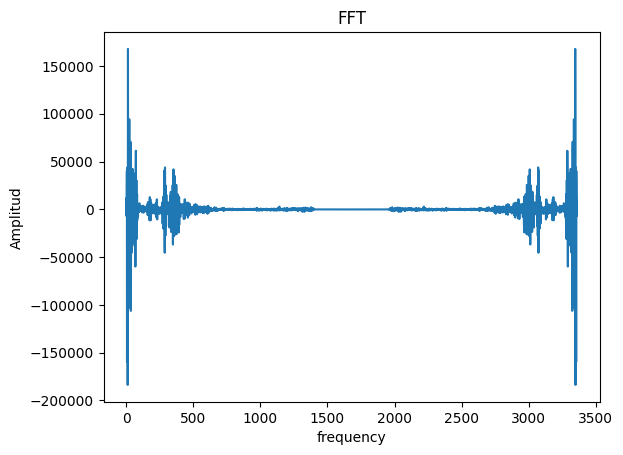

In [32]:
fourier = fft(cut)
plt.figure()
plt.plot(fourier)
plt.title("FFT")
plt.xlabel("frequency")
plt.ylabel("Amplitud")
plt.show()

només m'importa el que pasa a prop de zero

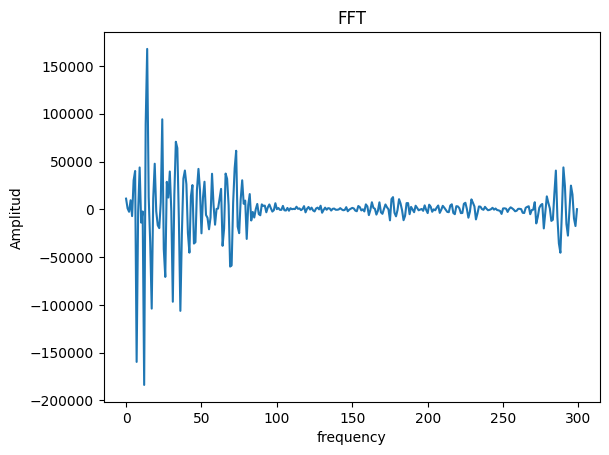

In [33]:
Fsmall = fourier[0:300]
plt.figure()
plt.plot(Fsmall)
plt.title("FFT")
plt.xlabel("frequency")
plt.ylabel("Amplitud")
plt.show()

No m'importa la fase, només el módul.


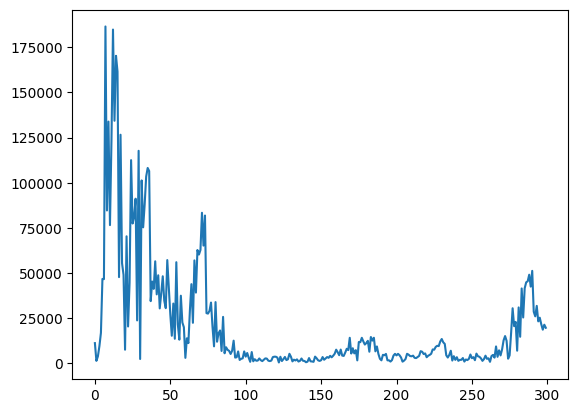

In [34]:
toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))
plt.figure()
plt.plot(toprocess)
plt.show()

Aplico un filtre per quedar eliminar soroll

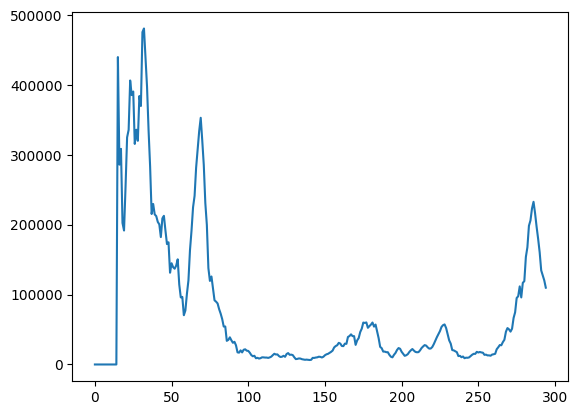

32

In [35]:
filter = 5
out = np.zeros(len(toprocess)-filter, dtype=np.float64)
for i in range(len(toprocess)-filter):
    for j in range(filter):
        out[i] += toprocess[i+j]

        
out[0:15] = 0
        
plt.figure()
plt.plot(out)
plt.show()

np.argmax(out)

32


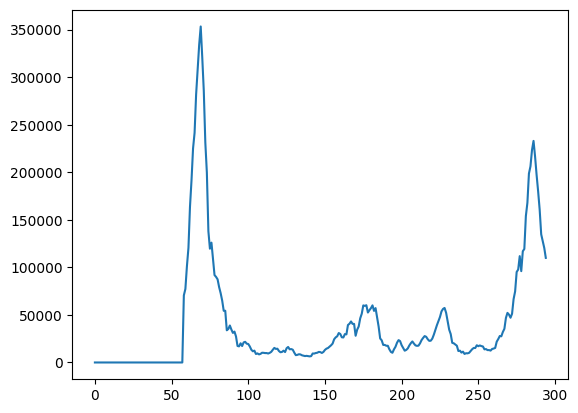

69


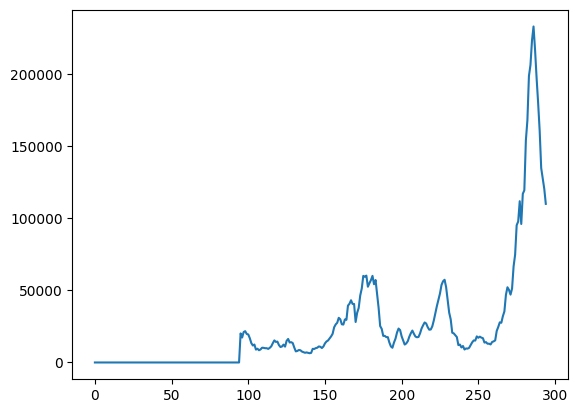

286


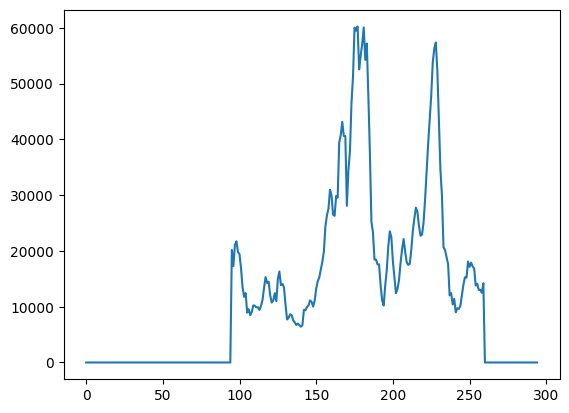

In [36]:
filter2 = 26

maxim1 = np.argmax(out)
print(maxim1)

filmin = filter2
if maxim1 < filter2:
    filmin = maxim1

out[maxim1-filmin:maxim1+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()

maxim2 = np.argmax(out)
print(maxim2)

out[maxim2-filter2:maxim2+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()


maxim3 = np.argmax(out)
print(maxim3)

out[maxim3-filter2:maxim3+filter2] = 0
plt.figure()
plt.plot(out)
plt.show()

In [37]:
print(fourier.size)
print(Fs)
print((maxim1)*Fs/fourier.size, "Hz")
print((maxim2)*Fs/fourier.size, "Hz")
print((maxim3)*Fs/fourier.size, "Hz")

3360
48000
457.14285714285717 Hz
985.7142857142857 Hz
4085.714285714286 Hz


In [69]:
import json
import numpy as np #aqui hi ha les estructures de dades que faig servir
import matplotlib.pyplot as plt #per dibuixar
import scipy.io as sio #el input output d'audio (wavfile.read)
from IPython.display import Audio #el reproductor d'audio
from numpy.fft import fft, ifft #podria fer numpy.fft en comptes de fer aquest import
from wav2vec import cutvowel, wav2vec #el nostre modul

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def freq2mostra(freq, Fs, mostres_totals):
    return freq * mostres_totals /Fs

def cosasconaudios(num):
    start = float(data[num]["start"])
    end=float(data[num]["end"])

    Fs, audio = sio.wavfile.read("audio_xavi.wav")
    cut = audio[int(start*Fs):int(end*Fs)]
    fourier = fft(cut)
    Fsmall = fourier[0:int(freq2mostra(3000,Fs, len(cut)))]
    toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))
    
    filter = 2
    
    out = np.zeros(len(toprocess)-filter, dtype=np.float64)
    for i in range(len(toprocess)-filter):
        for j in range(filter):
            out[i] += toprocess[i+j]


    out[0:15] = 0
    filter2 = 48

    maxim1 = np.argmax(out)

    filmin = filter2
    if maxim1 < filter2:
        filmin = maxim1

    out[maxim1-filmin:maxim1+filter2] = 0

    maxim2 = np.argmax(out)

    out[maxim2-filter2:maxim2+filter2] = 0

    maxim3 = np.argmax(out)

    out[maxim3-filter2:maxim3+filter2] = 0

    max1 = int((maxim1)*Fs/fourier.size)
    
    max2 = int((maxim2)*Fs/fourier.size)
    
    max3 = int((maxim3)*Fs/fourier.size)
  


    return [[max1,max2,max3],[data[num]["vocal"]]]


x = []
y = np.array([])

for i in range(len(data)):
    new_values = cosasconaudios(i)
    x.append(new_values[0])  
    y = np.append(y, new_values[1])


x = np.array(x)






In [70]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=90)

svm_classifier = SVC(kernel='linear')  


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")

Confusion matrix:
[[3 0 0 0 0]
 [0 1 0 0 0]
 [0 1 4 0 0]
 [0 0 0 2 0]
 [0 0 0 1 3]]

Reporte de clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           E       0.50      1.00      0.67         1
           I       1.00      0.80      0.89         5
           O       0.67      1.00      0.80         2
           U       1.00      0.75      0.86         4

    accuracy                           0.87        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.92      0.87      0.88        15

Precisión: 0.87


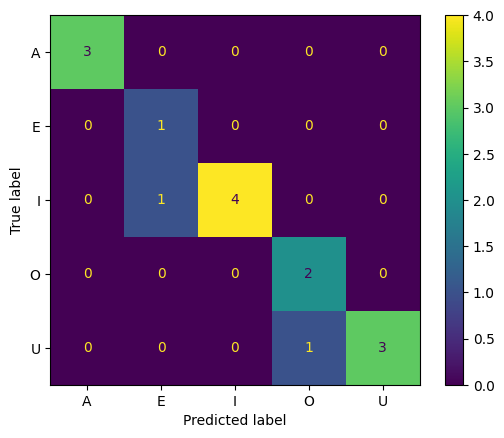

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)

# Partir en X trozos audio


[[2.89479339e+07 4.18071486e+07 3.21950102e+07 5.76982279e+06
  1.34557967e+07 3.69118800e+06 1.64278871e+06 2.33812458e+06
  4.84073133e+06 1.64267518e+06]
 [2.84042549e+07 3.54966658e+07 5.42505451e+06 1.76453144e+06
  1.52922812e+06 4.22483814e+06 5.77994460e+06 2.04852296e+06
  3.24041013e+06 1.04906719e+06]
 [4.38130928e+07 2.73785358e+07 6.29944866e+06 3.25132052e+06
  2.42065349e+06 2.24991290e+06 5.08648379e+06 6.69723414e+06
  5.90868121e+06 4.68665605e+06]
 [3.07578208e+07 2.67900295e+07 6.37845048e+06 3.67850998e+06
  8.85823980e+05 5.46192704e+05 4.48349507e+05 3.74381509e+05
  4.16984021e+05 5.15484056e+05]
 [2.83469132e+07 4.08534867e+07 1.79902229e+07 7.98677719e+06
  8.83957888e+06 2.31241574e+06 1.41790253e+06 1.98344769e+06
  2.25912482e+06 1.10721109e+06]
 [3.18579894e+07 3.84749511e+07 1.39553305e+07 1.19292369e+07
  2.52412758e+06 1.43918441e+06 1.18775576e+06 1.44477846e+06
  2.52345268e+06 9.09765519e+05]
 [1.65798836e+07 1.91504187e+07 1.56583610e+07 5.06542279e

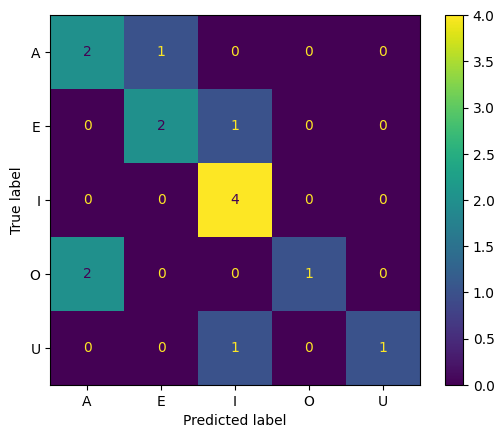

In [78]:
def resize_fft(fft_audio, muestras, cut_frequency) : 
    x_mostra = np.zeros(muestras) 
    sample_rate = int(cut_frequency/muestras) 
    samples_to_take = int(sample_rate*len(fft_audio)/cut_frequency) 
    for i in range (muestras) : 
        for j in range (samples_to_take) : 
            #print(i*(samples_to_take- 1)+j)  0-300 100 
            x_mostra[i] += fft_audio[i*samples_to_take+j] 
    return x_mostra 

def xValues(num):
    start = float(data[num]["start"])
    end=float(data[num]["end"])

    Fs, audio = sio.wavfile.read("audio_xavi.wav")
    cut = audio[int(start*Fs):int(end*Fs)]
    fourier = fft(cut)
    Fsmall = fourier[0:int(freq2mostra(3000,Fs, len(cut)))]
    toprocess = np.sqrt((np.real(Fsmall)**2+np.imag(Fsmall)**2))

    x = resize_fft(toprocess, 10, 3000) 

    return [x,[data[num]["vocal"]]]


x = []
y = np.array([])

for i in range(len(data)):
    new_values = xValues(i)
    x.append(new_values[0])  
    y = np.append(y, new_values[1])


x = np.array(x)


print(x) 
print(y) 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

svm_classifier = SVC(kernel='linear')  


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")


ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)  